In [351]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t 
import seaborn as sns
import matplotlib.patches  as patches
from scipy.stats import norm
import statsmodels.api as sm

sns.set_style('whitegrid')
random.seed(30)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (12.5, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Normality Assumption

- We have the assumption that the distribution of the means $\Delta$ follows a normal distribution. 

## Why is it important?
- We have the assumption that the distribution of the means follows a normal distribution. This is a strong assumption to have and needs to be tested/ensured before further methods. Why is that so? Well, a 1.96 * Standard error estimates the population to be within 95% confidence interval in a normal distribution.

For example, let us consider an event where we are interested in knowing what is in the 5% of a probability distribution and we assume our distribution to be normal when it is not. You can clearly observe from the plot below that the areas under the curve are vastly different. __Any statistic we would calculate under the assumption would be wrong__

In [352]:
def compare_plot(df,alpha):
    critical_value = stats.t.ppf(1.0 - alpha, df)
    f, ax = plt.subplots(1)
    ax.set_ylim(bottom=0,top=0.41)
    x = np.linspace(stats.t.ppf(0.01, df),
                    stats.t.ppf(0.99, df), 100)
    plt.plot(x, stats.t.pdf(x, df), color = 'r', label =f'$t-distribution$ with df 3 (not normal)')
    plt.fill_between(x=np.arange(-4.54,-critical_value,0.01),
                     y1= t.pdf(np.arange(-4.54,-critical_value,0.01), df),
                        facecolor='r',
                        alpha=0.5)     
    plt.text(x=(-critical_value-4.54)/1.7, y=0.04, color='red',size='large', s= f'$Area = {alpha}$')
    # plotting standard normal distribution
    x_axis = np.arange(-4, 4, 0.01)
    plt.plot(x_axis, stats.norm.pdf(x_axis,0,1), color ='b', label = f'$z- distribution$ (normal)')
    
    plt.fill_between(x=np.arange(-4,-critical_value,0.01), 
                y1= stats.norm.pdf(np.arange(-4,-critical_value,0.01)),
                facecolor='b',
                alpha=0.5)
    plt.axvline(x=-critical_value, color = "black", alpha=0.5,linestyle='--')
    plt.text(x=-critical_value, y=0.04, size='large',color='b', s= f'$Area = {round(stats.norm.cdf(-critical_value),3)}$')
    plt.legend()
    plt.title('Error due to incorrect Assumption of Normal Distribution')

__If we would have assumed our 't-distribution with 3 df' to be normal and had applied normal distribution formula to it to obtain the area of the curve (here, p-value), it would have been 0.061 or 6.1%. However, The true area would have been 0.11 which is 11%. Our calculation in the area would have been off by 4.9% which is a significant error and any inference that would follow would have serious flaw in it__ 

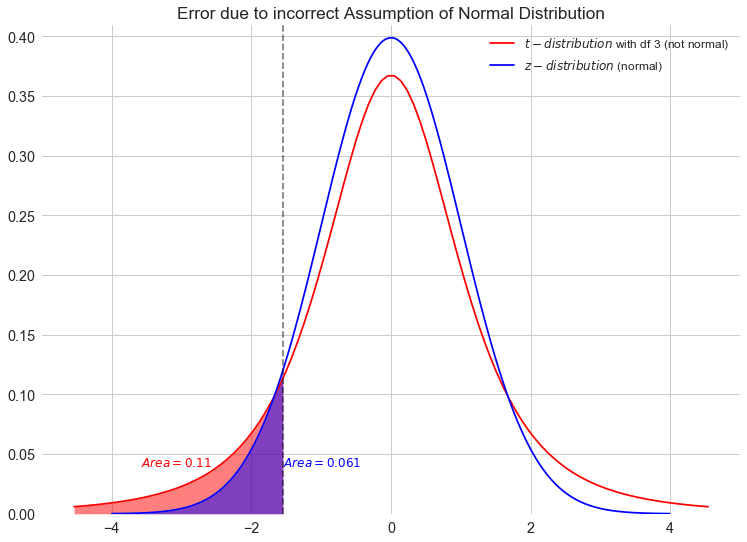

In [353]:
compare_plot(3,0.11)

## Tests for Normality:

### 1) Q-Q Plots:

Quantile plot is a grpahical tool to assess if the set of data came from a desired distribution. It is a scatterplot created by two sets of quantiles against one other. If both sets of quantiles came from the same distribution, we would see the points forming a line that is roughly straight. For Normal distribution, with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. The 0.95 quantile, or 95th percentile, is about 1.64. Similarly, 95 percent of the data lie below 1.64. 
__We are comparing theoretical 'ideal normal distribution quantiles' with the observed one. If they line up, we have a normal distribution.  If our data adheres to the red 45 degree line, it’s normal or close to it, and if it does not, then it’s not normal.__

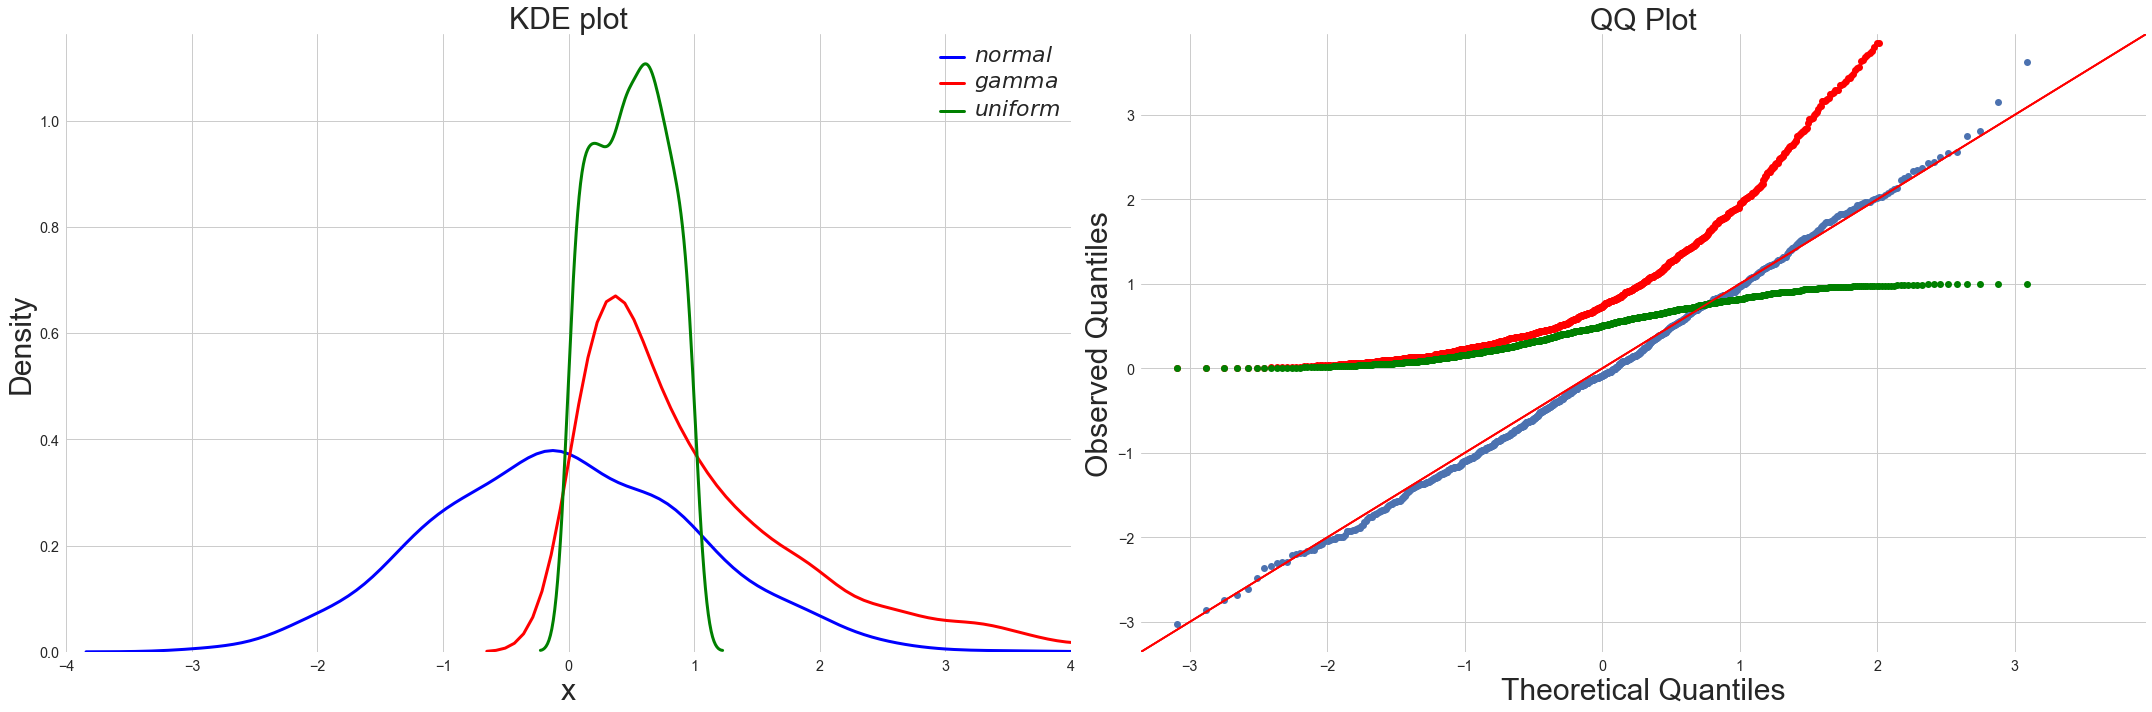

In [358]:
fig = plt.figure(figsize=(30, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('KDE plot', fontsize=30)
ax1.set_ylabel('Density', fontsize=30)
ax1.set_xlabel('x', fontsize=30)
normal = np.array([np.random.normal() for i in range(1000)])
gamma = np.array([np.random.gamma(1.1) for i in range(1000)])
uniform = np.array([np.random.uniform() for i in range(1000)])

ax1.set_xlim(left=-4,right=4)
sns.distplot(normal,hist=False ,kde_kws={"color": "blue", "lw": 3}, label=f'$normal$')
sns.distplot(gamma,hist=False, kde_kws={"color": "red", "lw": 3}, label=f'$gamma$')
sns.distplot(uniform ,hist=False, kde_kws={"color": "green", "lw": 3},label=f'$uniform$')
plt.setp(ax1.get_legend().get_texts(), fontsize='22')

ax2 = plt.subplot(1, 2, 2)
sm.qqplot(normal,ax=ax2,color='blue',line='45')
sm.qqplot(gamma,ax=ax2,color='red',line='45')
sm.qqplot(uniform,ax=ax2,color='green',line='45')
ax2.get_lines()[0].set_markerfacecolor('C0')
ax2.set_title('QQ Plot', fontsize=30)
ax2.set_ylabel('Observed Quantiles', fontsize=30)
ax2.set_xlabel('Theoretical Quantiles', fontsize=30)

plt.subplots_adjust(hspace = 200)
plt.tight_layout()

In [355]:
import numpy as np

measurements = np.random.normal(loc = 20, scale = 5, size=100000)

def qq_plot(data, sample_size):
    qq = np.ones([sample_size, 2])
    np.random.shuffle(data)
    qq[:, 0] = np.sort(data[0:sample_size])
    qq[:, 1] = np.sort(np.random.normal(size = sample_size))
    return qq

print (qq_plot(measurements, 1000))

[[ 1.75426402 -3.39237088]
 [ 3.22653147 -3.11302263]
 [ 4.80211691 -2.74682162]
 ...
 [35.02237535  2.84054078]
 [35.18731549  2.86065021]
 [37.35561466  2.91237078]]


In [ ]:
# a list of sample mean
control_means,treatment_means =[],[]
samplesize = 20

#running 500 simulations of : taking 20 samples and calculating their means
for j in range(0,500):
    sample_control = random.choices(control, k=samplesize)
    control_means.append(sum(sample_control)/len(sample_control))
    sample_treatment = random.choices(treatment, k=samplesize)
    treatment_means.append(sum(sample_treatment)/len(sample_treatment))

In [ ]:
from scipy.stats import shapiro
from scipy.stats import anderson 
from scipy.stats import kstest

stat, p = shapiro(control_means)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')
    
stat = anderson(control_means, dist='norm')
print('Statistics={}, p={}'.format(stat, p))

for i in range(len(stat.critical_values)):
    sl, cv = stat.significance_level[i], stat.critical_values[i]
    if stat.statistic < stat.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

stats.kstest(control_means, 'norm', N=999, alternative='two-sided')

# Have enough sample sizes.

One of the strategies to observe the $\Delta$ to follow a normal distribution is to have enough sample sizes. Let us illustrate an example of observing data from a $\gamma$ distribution. 
Let us take 1, 3, 10, 100, 200 samples each from the population and see how the $\Delta$ looks like 

In [ ]:
population = np.random.beta(8, 1, size=10000)

one,five,ten,hundred,thousand = [],[],[],[],[]
def sample_generator(plot='kde'):
    my_lists = [[],[],[],[],[]]
    sample_sizes = [1, 3, 10, 100, 200]
    
    for i,sample_size in enumerate(sample_sizes):
        for j in range(0,1000):
            sample_variant = random.choices(population, k=sample_size)
            mean = sum(sample_variant)/len(sample_variant)
            my_lists[i].append(mean)
        #idx += 1 
        #sns.distplot(my_lists[i] , color=colors[i], hist=False, label=f'$n = {sample_size}$')
    #f, ax = plt.subplots(1)
   # ax.set_ylim(bottom=0,top=0.41)
   # plt.legend()
    return my_lists
        
my_lists = sample_generator()

In [ ]:
# Import data
x1,x2,x3,x4,x5 = my_lists[0], my_lists[1], my_lists[2],my_lists[3],my_lists[4]
# plot
#fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
f, ax = plt.subplots(1)
ax.set_xlim(left=0.8,right=1.1)
sns.distplot(x1 , color="dodgerblue", hist=False, label=f'$n = 1$')
sns.distplot(x2 , color="deeppink", hist=False, label=f'$n = 3$')
sns.distplot(x3 , color="gold", hist=False, label=f'$n = 10$')
sns.distplot(x4 , color="green", hist=False, label=f'$n = 100$')
sns.distplot(x5 , color="black", hist=False, label=f'$n = 200$')

plt.title(f'Distribution of $\Delta$ approaches normal distribution with increased sample sizes')
plt.yticks([])
plt.xticks([])
plt.legend() 

In [304]:
x1.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
f, ax = plt.subplots(1)
qqplot(np.array(x1), ax = ax,line='s')
qqplot(np.array(x1), ax = ax,line='s')
qqplot(np.array(x1), ax = ax,line='s')
qqplot(np.array(x1), ax = ax,line='s')
qqplot(np.array(x1), ax = ax,line='s')